# Analyzing Birmingham Parking data
http://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#

In [1]:
import pandas as pd
from pandas import Grouper

## Initialization

In [2]:
train=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip',
                 compression='zip')
train.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [3]:
train.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


## Data cleaning

In [4]:
train=train.rename(str.lower, axis='columns')

In [5]:
train.lastupdated = pd.to_datetime(train.lastupdated, infer_datetime_format=True)
train.dtypes

systemcodenumber            object
capacity                     int64
occupancy                    int64
lastupdated         datetime64[ns]
dtype: object

## Feature engineering

In [6]:
train['occ_per'] = train.occupancy / train.capacity
train.head()

,systemcodenumber,capacity,occupancy,lastupdated,occ_per
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,0.105719
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,0.110919
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,0.138648
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,0.185442
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,0.259965


## Visualizing data

In [7]:
train.groupby(Grouper(key='lastupdated', freq='W')).sum().plot.line(y='occ_per')

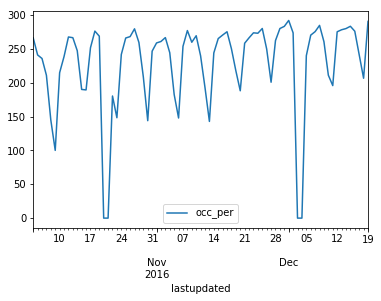

In [8]:
train.groupby(Grouper(key='lastupdated', freq='D')).sum().plot.line(y='occ_per')

In [15]:
train.systemcodenumber.unique.head()

AttributeError: 'function' object has no attribute 'head'

In [14]:
ltrain=pd.DataFrame(data={train.systemcodenumber.unique, train.capacity.unique})
#ltrain['systemcodenumber'] = train.systemcodenumber.unique()
#ltrain['capacity'] = train.capacity.unique()
ltrain.head()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
train.systemcodenumber.unique().nlargest(5, 'capacity')